In [477]:
import tesserocr
# Download and extract this: https://github.com/tesseract-ocr/tessdata/archive/refs/tags/4.1.0.zip
# to: '../../ressources/tesserocr/tessdata-4.1.0'

from dataclasses import dataclass
from PIL import Image

import cv2
import numpy as np

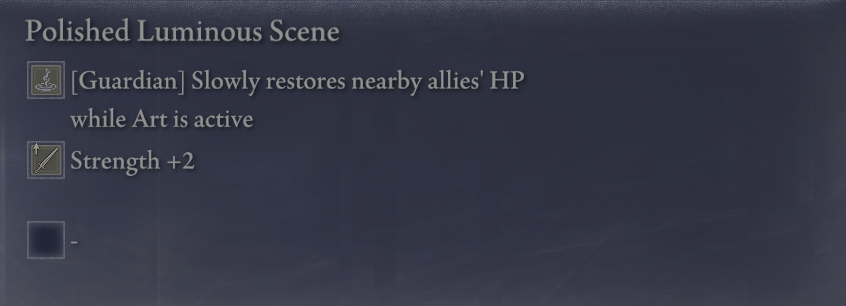

In [478]:
image = Image.open("../../relics/72.png")
image

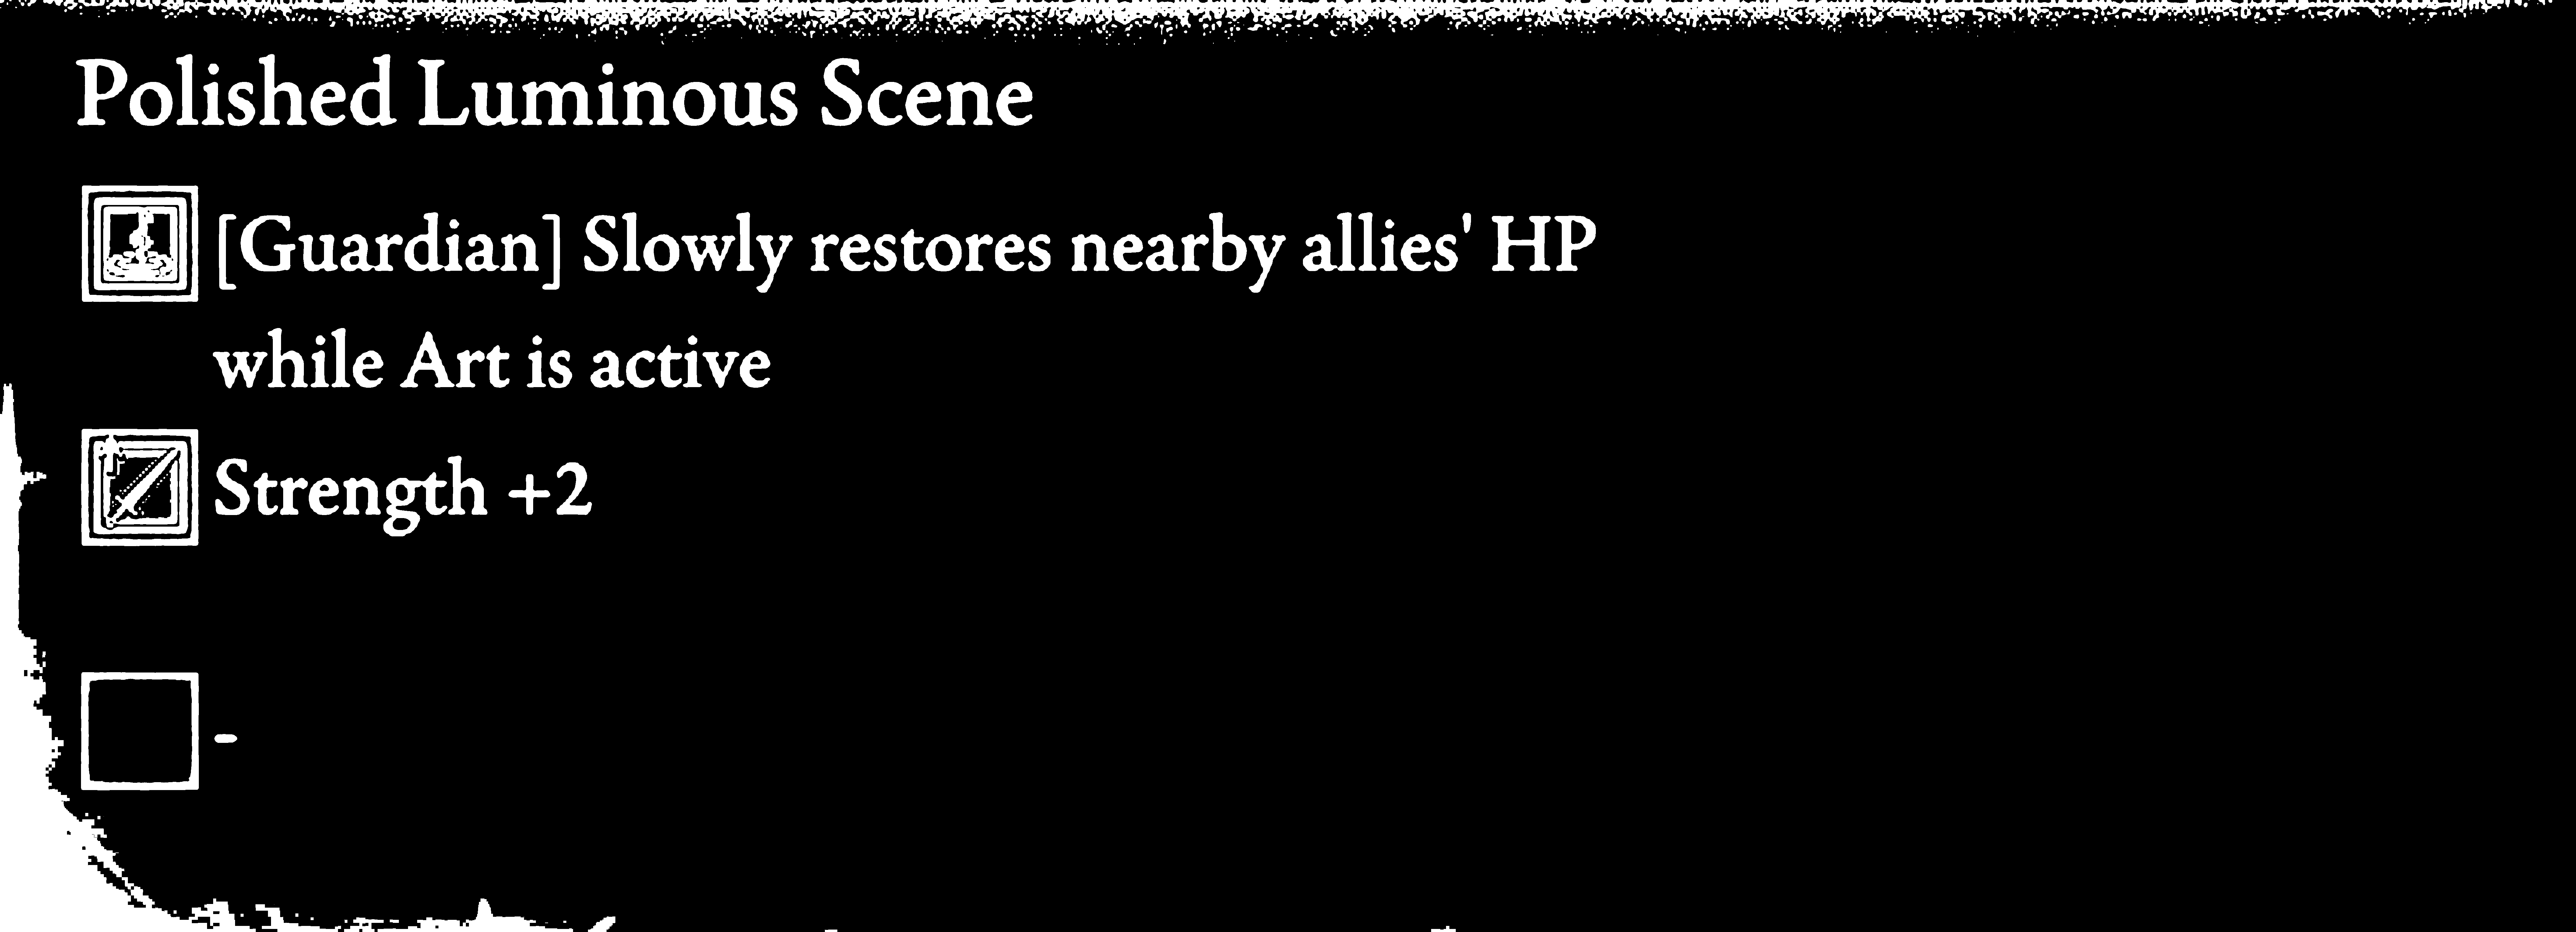

In [479]:
# Processing the image a bit so that the OCR returns an empty string for all cases
# when nothing is there instead of hallucinating characters

image = image.resize((image.width * 10, image.height * 10))

image = cv2.cvtColor(np.array(image), cv2.COLOR_BGR2GRAY)

# blur = cv2.GaussianBlur(image, (5,5), 0)
_, image = cv2.threshold(image, 75, 255, cv2.THRESH_BINARY)
# image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)

image = Image.fromarray(image)
image

In [480]:
relic_name_rect = TextZone(
    0 / 846, 15 / 306,
    846 / 846, 45 / 306,
    image.width, image.height
)

first_effect_rect = TextZone(
    68 / 846, 61 / 306,
    781 / 846, 80 / 306,
    image.width, image.height
)

second_effect_rect = TextZone(
    68 / 846, 141 / 306,
    781 / 846, 80 / 306,
    image.width, image.height
)

third_effect_rect = TextZone(
    68 / 846, 221 / 306,
    781 / 846, 80 / 306,
    image.width, image.height
)

Polished Luminous Scene


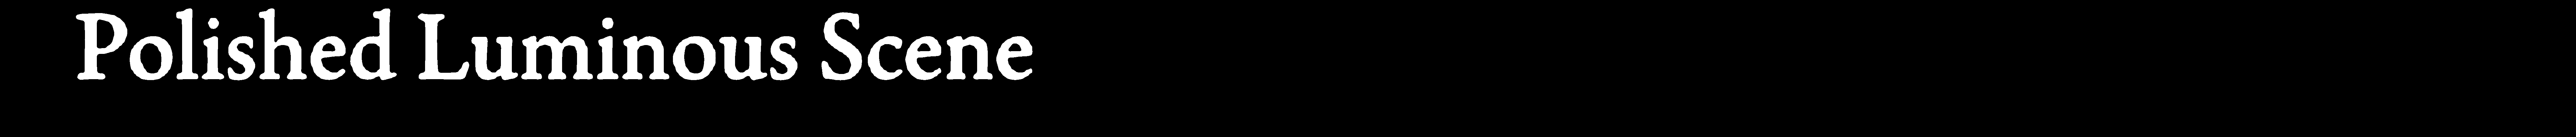

In [481]:
relic_name_im = image.crop(relic_name_rect.pil_crop())
print(tesserocr.image_to_text(relic_name_im, path='../../ressources/tesserocr/tessdata-4.1.0', psm=6).replace('\n', ' ').strip())
relic_name_im

[Guardian] Slowly restores nearby allies' HP while Art is active


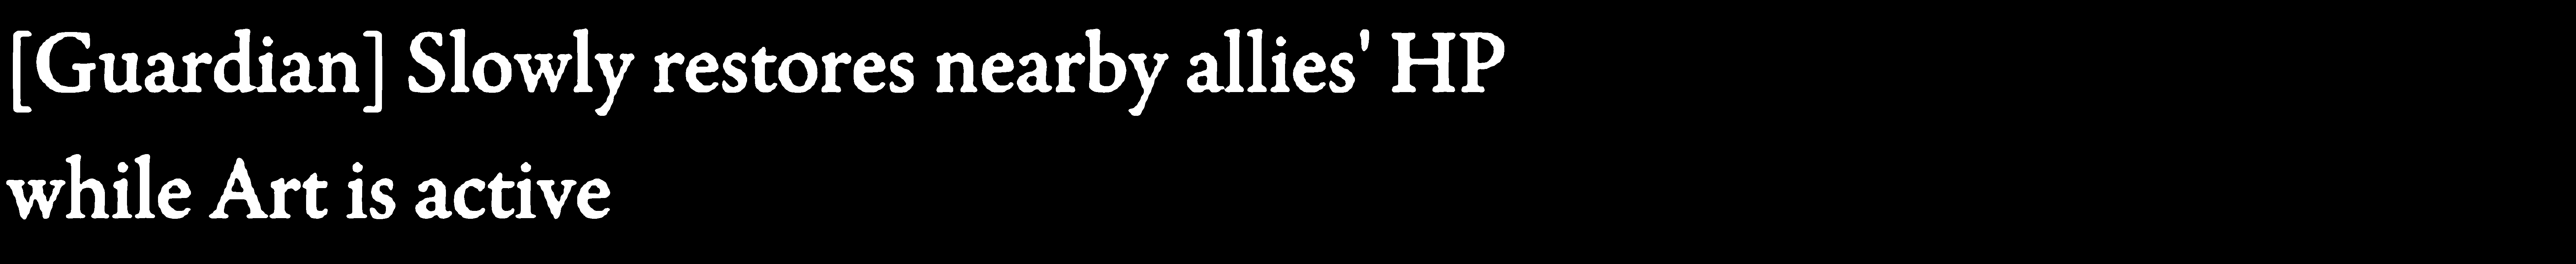

In [489]:
first_effect_im = image.crop(first_effect_rect.pil_crop())
print(
    tesserocr.image_to_text(
        first_effect_im,
        path='../../ressources/tesserocr/tessdata-4.1.0',
        psm=6
    ).translate(str.maketrans({'\n': ' ', "’": "'"})).strip()
)
first_effect_im

Strength +2


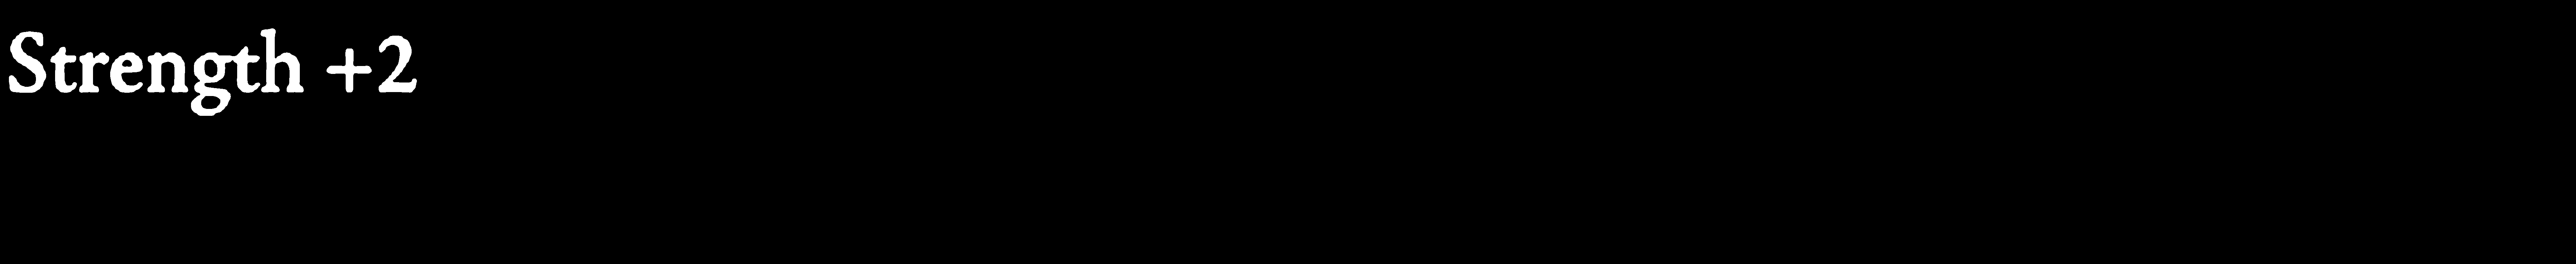

In [483]:
second_effect_im = image.crop(second_effect_rect.pil_crop())
print(tesserocr.image_to_text(second_effect_im, path='../../ressources/tesserocr/tessdata-4.1.0', psm=6).replace('\n', ' ').strip())
second_effect_im

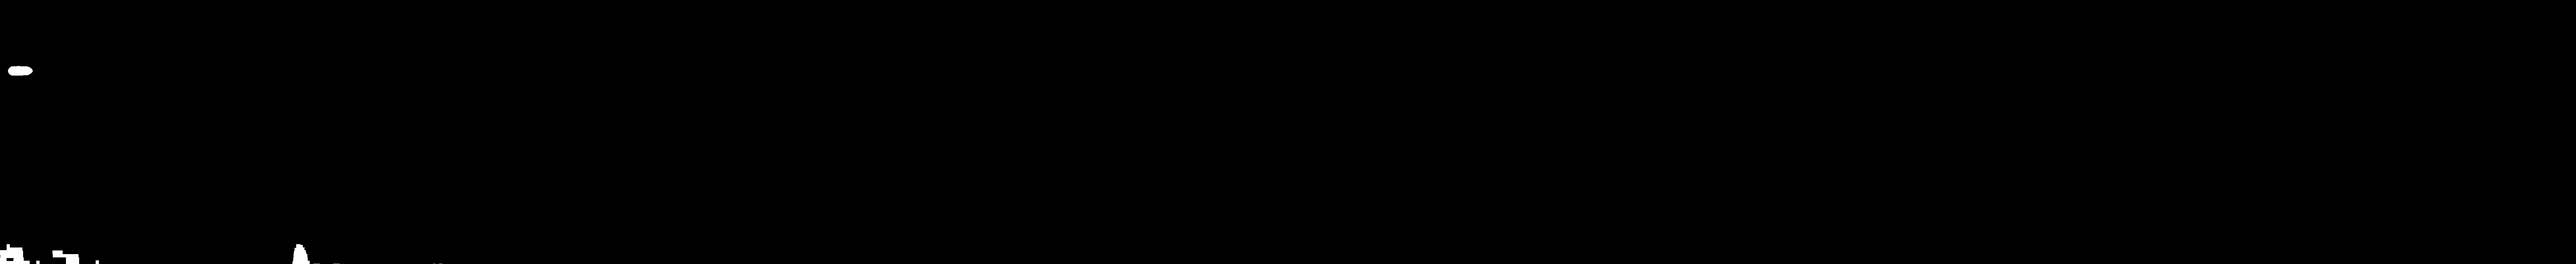

In [484]:
third_effect_im = image.crop(third_effect_rect.pil_crop())
print(tesserocr.image_to_text(third_effect_im, path='../../ressources/tesserocr/tessdata-4.1.0', psm=6).replace('\n', ' ').strip())
third_effect_im